#  Analyse de données : Tiers stratégiques sur Pokémon   

L'objectif de cette analyse est de déterminer les différentes caractéristiques qui définissent les tiers stratégiques sur le jeu Pokémon.
Pour cela, nous allons analyser les caractéristiques principales des Pokémon présents dans chacun des tiers et définir ce qui fait qu'un Pokémon sera dans un tier en particulier.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Données//pokemon-data.csv', delimiter=';')
mdf = pd.read_csv('Données//move-data.csv', delimiter=',')
pdf = pd.read_csv('Données//pokemon.csv', delimiter=',')

Tout d'abord, après avoir importé les librairies essentiels ainsi que les dataset utiles au projet, quelques éléments du dataset principal **df** ont été modifiés afin de faciliter leur analyse. Pour cette analyse, seuls les tiers principaux en stratégie seront utilisés, on modifie donc le dataset afin de garder les 6 tiers principaux. On crée ensuite une nouvelle colonne *"bst"* qui contiendra le total des statistiques de base des pokémons, puis une colonne *"tier_rank"* qui sera une adaptation de l'ordre des tiers en chiffre afin de générer plus facilement certains graphiques.

In [4]:
df.columns = ['name', 'types', 'abilities', 'tier', 'hp', 'atk', 'def', 'spa', 'spd', 'spe', 'next_evos','moves']
df.loc[df.tier == 'OUBL','tier'] = 'Uber'
df.loc[df.tier == 'UUBL','tier'] = 'OU'
df.loc[df.tier == 'RUBL','tier'] = 'UU'
df.loc[df.tier == 'NUBL','tier'] = 'RU'
df.loc[df.tier == 'PUBL','tier'] = 'NU'
df = df[df['tier'].isin(['Uber', 'OU', 'UU', 'NU', 'RU', 'PU'])]
df['bst'] = df['hp'] + df['atk'] + df['def'] + df['spa'] + df['spd'] + df['spe']
df['moveset'] = [len(a) for a in df.moves]
tiers = ['Uber', 'OU', 'UU', 'RU', 'NU', 'PU']                                                                      
df.loc[df['tier'] == "Uber", "tier_rank"] = 0
df.loc[df['tier'] == "OU", "tier_rank"] = 1
df.loc[df['tier'] == "UU", "tier_rank"] = 2
df.loc[df['tier'] == "RU", "tier_rank"] = 3
df.loc[df['tier'] == "NU", "tier_rank"] = 4
df.loc[df['tier'] == "PU", "tier_rank"] = 5
df = df.astype({'tier_rank': int})
df['moves'] = df.apply(lambda x: set(x.moves), axis=1)

Suite à cela, on fusionne les 2 dataset principaux, en se basant sur le nom anglais des pokémons. L'ajout du dataset **pdf** permettra d'avoir plus d'élements à analyser afin de répondre à notre problématique.

In [5]:
final_df = pd.merge(df, pdf, on='name')
final_df.head()

,name,types,abilities_x,tier,hp_x,atk,def,spa,spd,spe,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,...,50.0,460,132,105,30,grass,ice,135.5,4,0
1,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,...,50.0,359,115,60,115,dark,NaN,47.0,3,0
2,Accelgor,['Bug'],"['Hydration', 'Sticky Hold', 'Unburden']",NU,80,70,40,100,60,145,...,50.0,617,100,60,145,bug,NaN,25.3,5,0
3,Aegislash,"['Steel', 'Ghost']",['Stance Change'],Uber,60,50,150,50,150,60,...,50.0,681,150,50,60,steel,ghost,53.0,6,0
4,Aerodactyl,"['Rock', 'Flying']","['Pressure', 'Rock Head', 'Unnerve']",RU,80,105,65,60,75,130,...,88.1,142,70,95,150,rock,flying,59.0,1,0


Nous obtenons donc le dataset **final_df**, jeu de données qui contient les caracteristiques principales de chaque Pokémon disponible, ainsi que leur tier. Grâce à ce dataset, nous allons pouvoir répondre à notre problématique, et déterminer **comment les tiers stratégiques sont définis.**

Tout d'abord, nous allons analyser le pourcentage de Pokémon présent dans chaque tier.

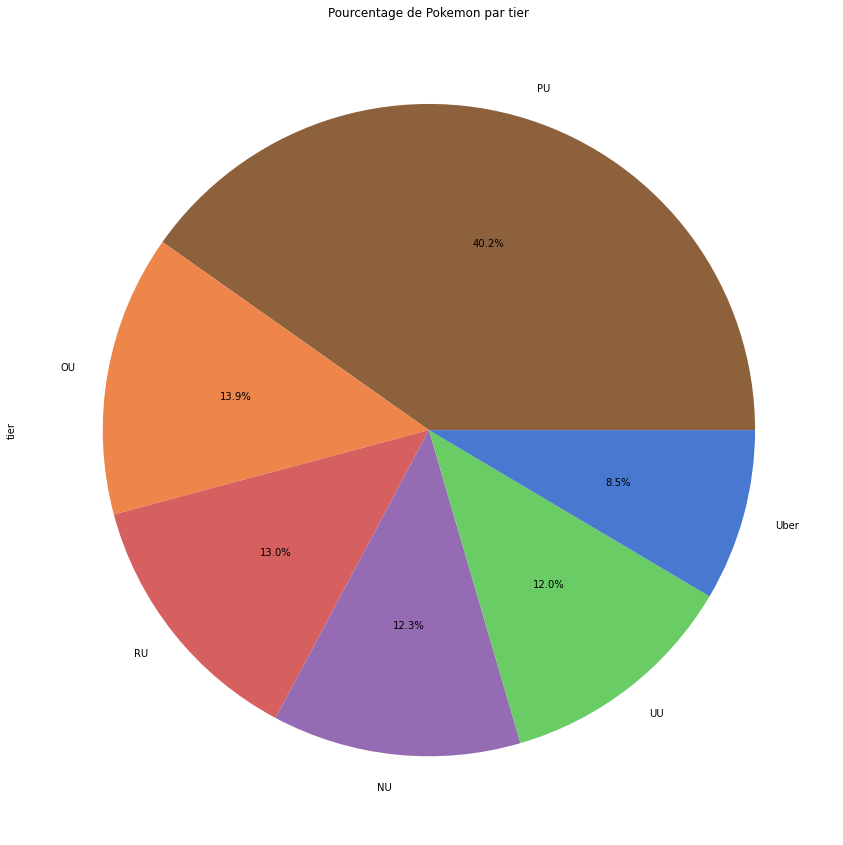

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
c = sns.color_palette('muted')
c = [c[5], c[1], c[3], c[4], c[2], c[0]]

ax = df.tier.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=c, title='Pourcentage de Pokemon par tier')

Après avoir analysé le pourcentage de pokémons présent dans chaque tier, nous pouvons pour chaque tier avoir une moyenne du **bst** des pokémons, qui correspond au total de leurs statistiques. Comme ce graphique le démontre, on peut facilement observer que plus on s'éloigne des tiers élevés, plus la moyenne de statistiques baisse.

In [23]:
df.bst[df['tier'] == "OU"].describe()

count     77.000000
mean     565.896104
std       68.916155
min      420.000000
25%      508.000000
50%      570.000000
75%      600.000000
max      700.000000
Name: bst, dtype: float64

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des statistiques'),
 Text(0.5, 1.0, 'Moyenne des statistiques selon le tier')]

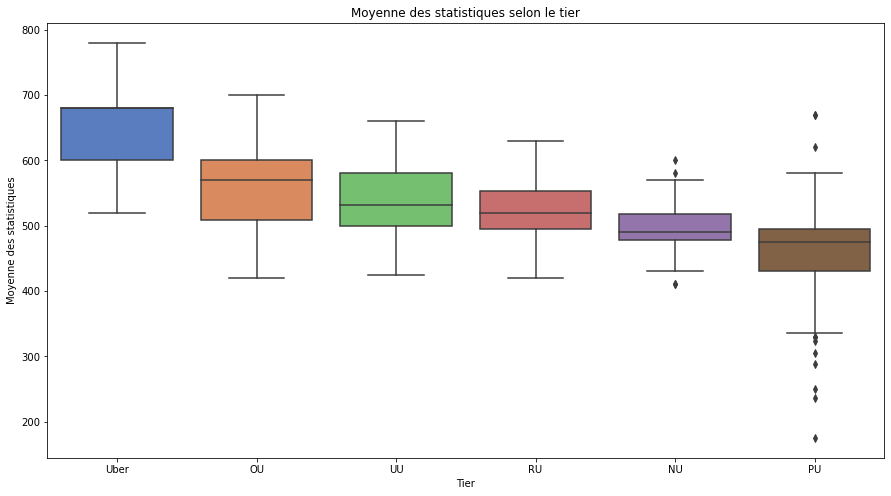

In [7]:
ax = plt.subplots(figsize=(15,8))
g2 = sns.boxplot(data=df, x='tier', y='bst', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des statistiques', title='Moyenne des statistiques selon le tier')

On peut aussi observer sur le tier **PU** de nombreuses valeurs aberrantes, correspondant à des pokémons ayant de très bonnes statistiques, mais un point faible rendant leur montée dans le classement impossible.

In [25]:
df.bst[(df['tier'] == "PU") & (df['bst'] > 400) & (df['bst']<500)].describe()

count    154.000000
mean     460.259740
std       28.659781
min      405.000000
25%      440.000000
50%      466.000000
75%      485.000000
max      498.000000
Name: bst, dtype: float64

Pour la suite de cette analyse, nous allons observer pour chaque tier la moyenne des capacités qu'un pokemon peut apprendre. En effet, un grand nombre de capacités permettrait de rendre un pokémon beaucoup plus intéressant, du fait qu'il soit moins prévisible d'évaluer ce qu'il peut utiliser lors d'un combat stratégique.

[Text(0.5, 0, 'Tier'),
 Text(0, 0.5, 'Moyenne des capacités'),
 Text(0.5, 1.0, 'Moyenne des capacités selon le tier')]

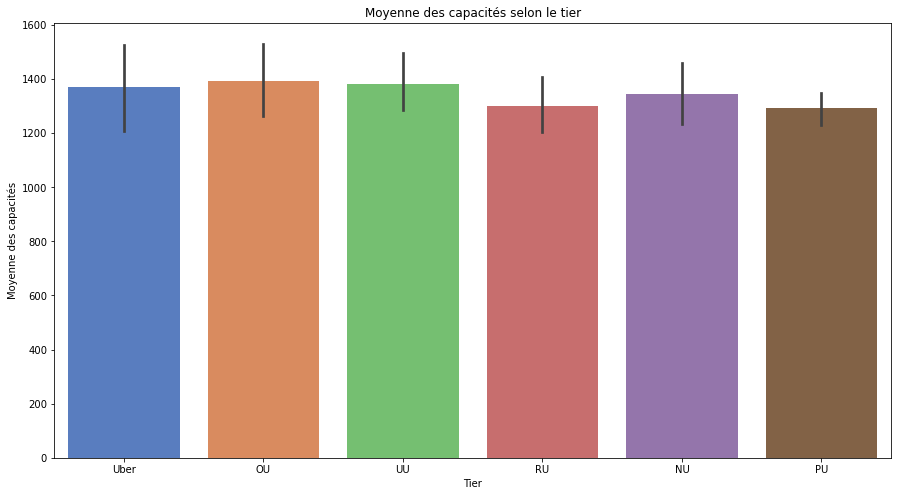

In [26]:
ax = plt.subplots(figsize=(15,8))
g2 = sns.barplot(data=df, x='tier', y='moveset', order=tiers, palette="muted", ax=ax[1])
ax[1].set(xlabel='Tier', ylabel='Moyenne des capacités', title='Moyenne des capacités selon le tier')

Comme on peut le constater, le nombre de capacités n'est pas un élément significatif permettant de définir le tier stratégique d'un pokémon. Pour tous les tiers, les moyennes sont assez égales et les écart-types sont très faibles. 



Nous allons maintenant analyser une autre caractérisque des pokémons : le fait qu'un pokémon soit légendaire ou non. En effet, pour la majorité des pokémons, être légendaire implique d'avoir une base de statistique plus élevée que la moyenne.

<AxesSubplot:xlabel='is_legendary', ylabel='bst'>

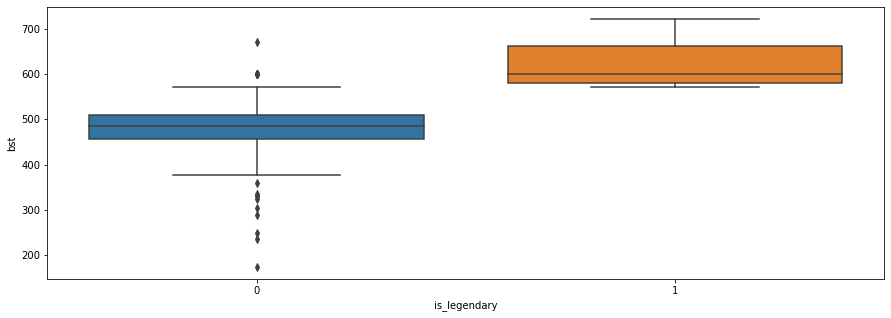

In [40]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=final_df, y="bst", x="is_legendary")

Grâce à ce graphique, on peut effectivement confirmer que les pokémons légendaires ont une moyenne de statistiques bien plus élevée que les pokémons "normaux". On pourrait donc conclure de façon pûrement théorique que les pokémons légendaires sont forcément dans des tiers élevés, mais nous allons utiliser un nouveau graphique pour prouver cela.

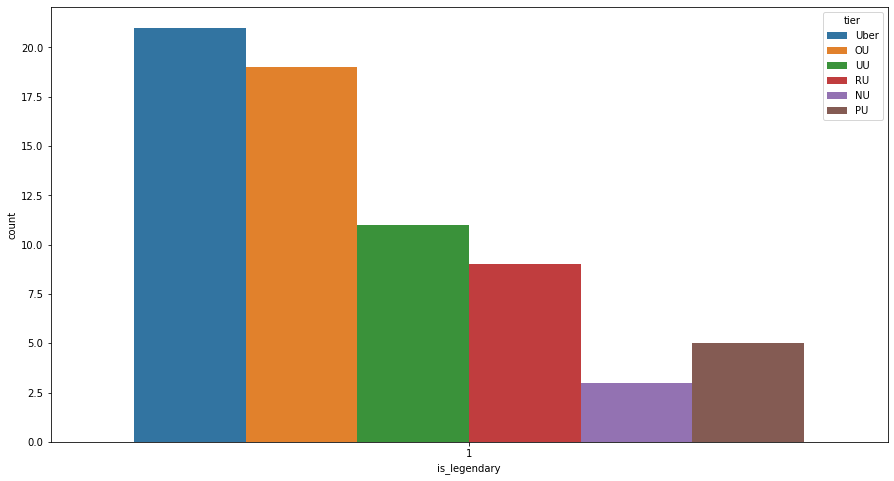

In [41]:
fig = plt.subplots(figsize=(15,8))
df_leg = final_df[final_df["is_legendary"] == 1]
fig = sns.countplot(data=df_leg, x="is_legendary", hue="tier", hue_order=tiers)

Comme évoquer sur le graphique précédent, on retrouve effectivement dans ce graphique les pokémons légendaires étant principalement dans les tiers les plus élevés. Ce graphique nous permettrait donc d'accentuer le fait qu'avoir une base de statistique élevée permet à un pokémon d'être dans les tiers les plus hauts (sans prendre en compte les éventuelles exceptions provoquées par un talent propre au pokémon (aptitude innée au pokémon et pouvant le rendre extrêmement fort comme extrêmement mauvais, mais il serait trop long de démontrer ce point dans cette analyse de données))

En conclusion, cette analyse de données a permis de démontrer que plusieurs critères peuvent permettre à un pokémon d'être haut placé dans les tiers stratégiques. Tout d'abord, avoir une bonne base de statistiques serait un élément significatif dans le choix du tier d'un pokémon, les pokémons légendaires étant un bon exemple de par leur moyenne de statistiques très élevée et leurs places majoritaires dans les tiers élevés. Cependant, d'autres aspects sont moins significatifs, comme le nombre de capacités d'un pokémon, qui ne varie pas vraiment entre les pokémons de différents tiers.